<a href="https://colab.research.google.com/github/Abinav160701/ML_Projects/blob/master/TimeSeries_LSTM_Airlines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
numpy.random.seed(7)

In [6]:
dataset=pd.read_csv('airline-passengers.csv',usecols=[1])

In [7]:
dataset.head()

,Passengers
0,112
1,118
2,132
3,129
4,121


In [8]:
dataset=dataset.values

In [10]:
dataset=dataset.astype('float32')

In [12]:
scaler=MinMaxScaler()
dataset=scaler.fit_transform(dataset)

In [13]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [14]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [15]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [17]:
model=Sequential()
model.add(LSTM(4,input_shape=(1,look_back)))
model.add(Dense(1))
model.compile(loss='mse',optimizer='adam')
model.fit(trainX,trainY,epochs=100,batch_size=1,verbose=2)

Epoch 1/100
94/94 - 2s - loss: 0.0458 - 2s/epoch - 17ms/step
Epoch 2/100
94/94 - 0s - loss: 0.0204 - 125ms/epoch - 1ms/step
Epoch 3/100
94/94 - 0s - loss: 0.0163 - 118ms/epoch - 1ms/step
Epoch 4/100
94/94 - 0s - loss: 0.0148 - 134ms/epoch - 1ms/step
Epoch 5/100
94/94 - 0s - loss: 0.0135 - 124ms/epoch - 1ms/step
Epoch 6/100
94/94 - 0s - loss: 0.0121 - 130ms/epoch - 1ms/step
Epoch 7/100
94/94 - 0s - loss: 0.0108 - 116ms/epoch - 1ms/step
Epoch 8/100
94/94 - 0s - loss: 0.0097 - 155ms/epoch - 2ms/step
Epoch 9/100
94/94 - 0s - loss: 0.0085 - 122ms/epoch - 1ms/step
Epoch 10/100
94/94 - 0s - loss: 0.0074 - 123ms/epoch - 1ms/step
Epoch 11/100
94/94 - 0s - loss: 0.0065 - 121ms/epoch - 1ms/step
Epoch 12/100
94/94 - 0s - loss: 0.0056 - 144ms/epoch - 2ms/step
Epoch 13/100
94/94 - 0s - loss: 0.0048 - 151ms/epoch - 2ms/step
Epoch 14/100
94/94 - 0s - loss: 0.0043 - 118ms/epoch - 1ms/step
Epoch 15/100
94/94 - 0s - loss: 0.0037 - 146ms/epoch - 2ms/step
Epoch 16/100
94/94 - 0s - loss: 0.0032 - 134ms/epoc

In [18]:
trainPredict=model.predict(trainX)

In [19]:
testPredict=model.predict(testX)

In [20]:
trainPredict=scaler.inverse_transform(trainPredict)
trainY=scaler.inverse_transform([trainY])
testPredict=scaler.inverse_transform(testPredict)
testY=scaler.inverse_transform([testY])

In [22]:
trainScore=math.sqrt(mean_squared_error(trainY[0],trainPredict[:,0]))
testScore=math.sqrt(mean_squared_error(testY[0],testPredict[:,0]))


In [23]:
trainPredictPlot=np.empty_like(dataset)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict


In [24]:
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

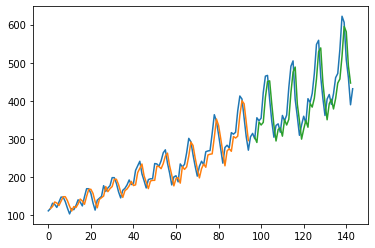

In [25]:
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()